# PGM for the new model

In [48]:
%%capture
import daft
pgm = daft.PGM([5.1, 4], origin=[0, 0], grid_unit=2, node_unit=1.5, observed_style="inner")

##
pgm.add_node(daft.Node("s_ij"  , r"$\sigma_{ij}$", 1.0  , 2.5, fixed=True, offset=(0,0.75)))
pgm.add_node(daft.Node("obs"   , r"B/v$_{obs}$"  , 1.125, 1.25))
pgm.add_node(daft.Node("oct2"  , r"Oct.-2"       , 2, 3.5))
pgm.add_node(daft.Node("oct32" , r"Oct.-32"      , 3.325, 3.5))
pgm.add_node(daft.Node("oct8"  , r"Oct.-8"       , 4.65, 3.5))

pgm.add_node(daft.Node("RAPS_M", r"RAPS$_M$", 4, 1.25))

##
pgm.add_node(daft.Node("FF", r"FF_M", 3.325, 2.25))


##
pgm.add_node(daft.Node("RAPS_obs", r"RAPS$_{obs}$", 2.75, 1.25, observed=True))

##
pgm.add_edge("obs","RAPS_obs");
pgm.add_edge("s_ij", "obs");
pgm.add_edge("RAPS_M", "RAPS_obs");
pgm.add_edge("FF", "RAPS_M");
pgm.add_edge("oct2", "FF");
pgm.add_edge("oct8", "FF");
pgm.add_edge("oct32", "FF");
pgm.add_edge("oct2", "oct32"); pgm.add_edge("oct8", "oct32");


##
pgm.add_plate(daft.Plate([0.25, 0.25, 1.75, 2.75 ], label=r"Obs. Pixel $i,j$",shift=-0.1))

pgm.render()
pgm.figure.savefig("PGM.png", dpi=300)

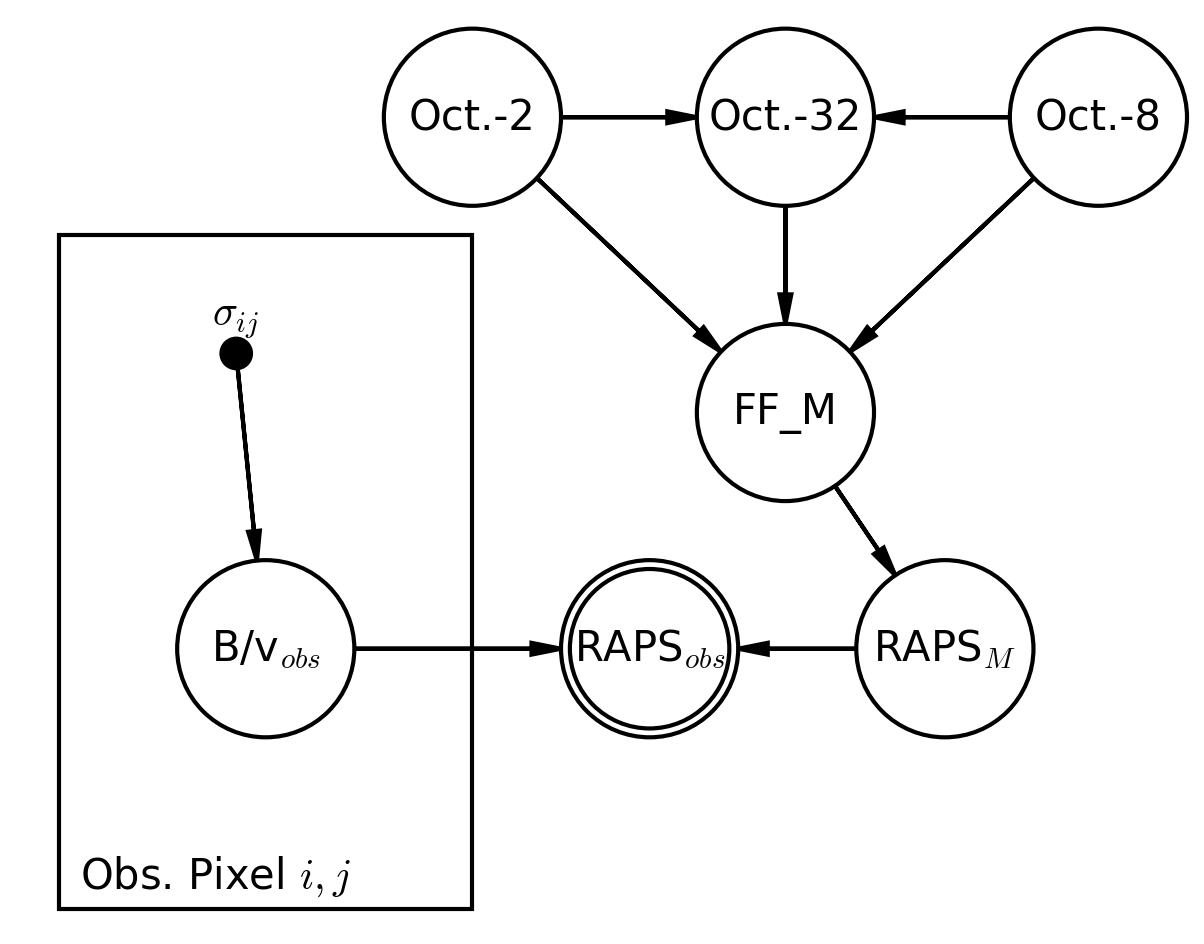

In [49]:
from IPython.display import Image
Image(filename="PGM.png")